# Question 1
How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

## Answer:
The Resultant matrix of matrix multplication between a A(n,k) and B(k,m) matrix is an (n,m) matrix. The formula of each element is given by:

$c(i,j)= \sum_{p=1}^k a_{ip}b_{pj} \ $

Therefore, for each element, we have $k$ multiplications and $k-1$ additions.
As there are $m \times n$ elements in resultant matrix, we have
Total Multiplications = $mn×k$
Total Additions =  $mn×(k-1)$

# Question 2
Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

Taking:
- $n=100$
- $k=20$
- $m=80$



In [13]:
import numpy as np
import time
x=np.random.rand(100,20)
y=np.random.rand(20,80)

start=time.time()
z=np.matmul(x,y)
end=time.time()

print("Time for numpy:",end-start)

x=list(x)
y=list(y)

multiple=np.zeros((100,80))
multiple=list(multiple)
start=time.time()

for i in range(len(x)):
  for j in range(len(y[0])):
    for k in range(len(y)):
      multiple[i][j]+=x[i][k]*y[k][j]
end=time.time()

print("Time without numpy",end-start)


Time for numpy: 0.00019693374633789062
Time without numpy 0.23040390014648438


### Multiplication using Numpy is faster.
This is because:
- Numpy array is a collection of similar data-types that are densely packed in memory. A Python list can have different data-types, which puts lots of extra constraints while doing computation on it.
- Numpy is able to divide a task into multiple subtasks and process them parallelly.
- Numpy functions are implemented in C. Which again makes it faster compared to Python Lists.



# Question 3
Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

Using the given method, we will have to iterate through the complete array n/2 times. Therefore the method will have order of $n \times n\times n\times....\times n$   ($\frac{n}{2}$ times) $= n^\frac{n}{2}$

A better method can be to first sort the array. The median in the sorted array is the middle element or the average of the middle elements.

In [55]:
import numpy as np
np.random.seed(0)
import time

def media(A,N):
  flag=0
  if N%2==0:
    flag=1
  for i in range(((N+2)//2)):
    max=0
    maxi=0
    for j in range(N):
      if max<=A[j]:
        max=A[j]
        maxi=j
    A[maxi]=0
    if flag==0 and i==(N//2):
      med=max
      break
    elif i==((N//2)-1):
      med2=max
    med=max
  if flag:
    return (med+med2)/2
  else:
    return med
A=np.random.randint(1,10000,size=(10000))
np.random.seed(0)
A_2=np.random.randint(1,10000,size=(10000))
N=len(A)
start=time.time()
mednp=np.median(A)
end=time.time()
print("With Numpy",mednp,"Time:",(end-start))
start=time.time()
med=media(A,N)
end=time.time()

print("Given Algorithm",med,"Time:",(end-start))
start=time.time()
A_2.sort()
if (N%2==0):
  median2=(A_2[(N)//2]+A_2[((N)//2)-1])/2
else:
  median2=A_2[(N)//2]
end=time.time()
print("Proposed Algorithm",median2,"Time:",end-start)


With Numpy 4951.0 Time: 0.0003495216369628906
Given Algorithm 4951.0 Time: 5.623218297958374
Proposed Algorithm 4951.0 Time: 0.0006964206695556641


# Question 4
What is the gradient of the following function with respect to x and y?

$x^2y+y^3sin(x)$

## Answer:
The gradiant of a function is given by the following:

$∇f(x,y)=\frac{∂f}{∂x}\hat{i} + \frac{∂f}{∂y}\hat{j}$

Solving for $f=x^2y+y^3sin(x)$ :

We get $∇f(x,y)= (2xy+y^3cos(x))\hat{i} + (x^2+3y^2sin(x))\hat{j}$

# Question 5
Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [53]:
import jax
import random
f= lambda x,y : (x**2)*y + (y**3)*(jax.numpy.sin(x))
f1= lambda x,y : 2*x*y + (y**3)*jax.numpy.cos(x)
f2= lambda x,y : x**2 + 3*(y**2)*jax.numpy.sin(x)
gradiant=jax.grad(f,argnums=(0,1))
val=gradiant(0.0,2.0)
count=0
for i in range(10):
  xnew=random.random()*10
  ynew=random.random()*10
  val=gradiant(xnew,ynew)
  if round(val[0],2)!=round(f1(xnew,ynew),2) or round(val[1],2)!=round(f2(xnew,ynew),2):
    print(val[0],f1(xnew,ynew))
    print(val[1],f2(xnew,ynew))
    print("Answers not same!")
    break
  else:
    count+=1
if count<10:
  print("Worked on",count,"tests.")
else:
  print("Worked on all tests!")


Worked on all tests!


# Question 6
Use sympy to confirm that you obtain the same gradient analytically.

In [59]:
import sympy as sp

x, y = sp.symbols('x y')

f = (x**2) * y + (y**3) * sp.sin(x)

grad_f = [sp.diff(f, var) for var in (x, y)]

print("Gradient:")
print(grad_f)


Gradient:
[2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x)]


# Question 7
Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:\
1. 2022
  - Branch 1
    - 1:
    Name:Steve
    Marks:
      1. Maths:92
      2. Science:93
  - Branch 2
2. 2021
  - Branch 1
  - Branch 2
3. 2020
  - Branch 1
  - Branch 2

In [2]:
D={2022:
        {"Branch 1":
                    {1:{"Name":"Steve","Marks":{"Maths":92,"Science":93}},
                     2:{"Name":"John","Marks":{"Maths":67,"Science":80}}},
         "Branch 2":
                    {1:{"Name":"Carl","Marks":{"Maths":87,"Science":79}}},
   2021:{"Branch 1":{},"Branch 2":{}},
   2020:{"Branch 1":{},"Branch 2":{}}}}


# Question 8
Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [9]:
class Student:
    def __init__(self, roll_number, name):
        self.roll_number = roll_number
        self.name = name
        self.marks = {}

    def add_mark(self, subject, mark):
        self.marks[subject] = mark

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

database = []
year_2022 = Year(2022)

branch_1 = Branch("Branch 1")
Steve = Student(1, "Steve")
Steve.add_mark("Maths", 92)
Steve.add_mark("English", 93)
John = Student(1, "John")
John.add_mark("Maths", 67)
John.add_mark("English", 80)
Carl = Student(1, "Carl")
Carl.add_mark("Maths", 87)
Carl.add_mark("English", 79)

branch_1.add_student(Steve)
branch_1.add_student(John)

branch_2 = Branch("Branch 2")
branch_2.add_student(Carl)
year_2022.add_branch(branch_1)
year_2022.add_branch(branch_2)
database.append(year_2022)

print("database[0].branches[0].students[0].marks[\"Maths\"]:",database[0].branches[0].students[0].marks["Maths"])


database[0].branches[0].students[0].marks["Maths"]: 92


# Question 9
Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.
1. $y=x$
2. $y=x^2$
3. $y=\frac{x^3}{100}$
4. $y=sin(x)$
5. $y=\frac{sin(x)}{x}$
6. $y=log(x)$
7. $y=e^x$

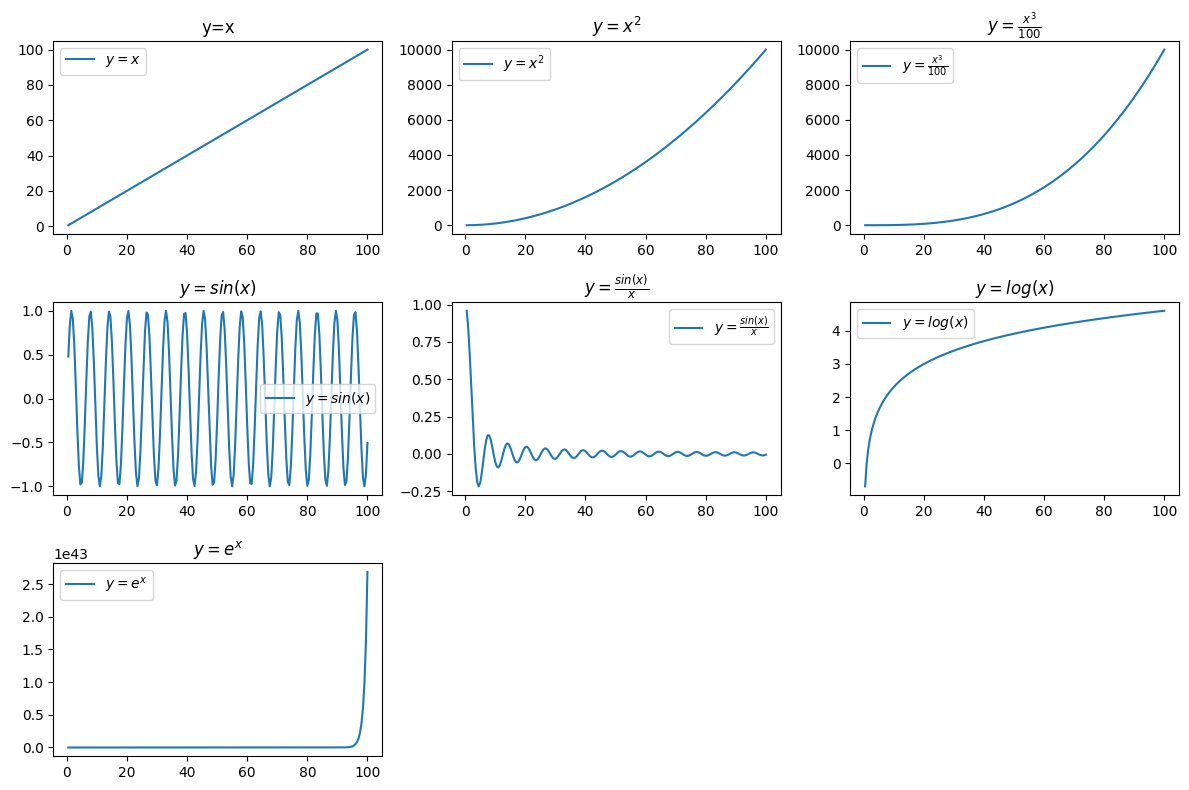

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x_values = np.arange(0.5, 100.5, 0.5)

y1 = x_values
y2 = x_values**2
y3 = x_values**3 / 100
y4 = np.sin(x_values)
y5 = np.sin(x_values) / x_values
y6 = np.log(x_values)
y7 = np.exp(x_values)

plt.figure(figsize=(12, 8))

plt.subplot(3, 3, 1)
plt.plot(x_values, y1, label='$y=x$')
plt.title('$y=x$')
plt.legend()

plt.subplot(3, 3, 2)
plt.plot(x_values, y2, label='$y=x^2$')
plt.title('$y=x^2$')
plt.legend()

plt.subplot(3, 3, 3)
plt.plot(x_values, y3, label='$y=\\frac{x^3}{100}$')
plt.title('$y=\\frac{x^3}{100}$')
plt.legend()

plt.subplot(3, 3, 4)
plt.plot(x_values, y4, label='$y=sin(x)$')
plt.title('$y=sin(x)$')
plt.legend()

plt.subplot(3, 3, 5)
plt.plot(x_values, y5, label='$y=\\frac{sin(x)}{x}$')
plt.title('$y=\\frac{sin(x)}{x}$')
plt.legend()

plt.subplot(3, 3, 6)
plt.plot(x_values, y6, label='$y=log(x)$')
plt.title('$y=log(x)$')
plt.legend()

plt.subplot(3, 3, 7)
plt.plot(x_values, y7, label='$y=e^x$')
plt.title('$y=e^x$')
plt.legend()

plt.tight_layout()
plt.show()


# Question 10
Using numpy generate a matrix of size $20\times5$ containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [45]:
import numpy as np
import pandas as pd

mat=np.random.random(size=(20,5))
mat=mat+1
data=pd.DataFrame(mat)
data.columns=["a","b","c","d","e"]
stds=data.std()
print("Column with highest standard deviation:",data.columns[np.argmax(stds)])
means=data.mean(axis=1)
print("Row with lowest mean:")
print(data.loc[np.argmin(means)])

Column with highest standard deviation: a
Row with lowest mean:
a    1.222086
b    1.340812
c    1.064248
d    1.047407
e    1.454523
Name: 5, dtype: float64


# Question 11
Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [46]:
data["f"]=data.sum(axis=1)
data["g"]=np.where(data["f"]<8,"LT8","GT8")
count=len(data.where(data["g"]=="LT8"))
lt8=data.where(data["g"]=="LT8")
gt8=data.where(data["g"]=="GT8")
dev=lt8["f"].std()
dev2=gt8["f"].std()
print("No. of Rows with LT8:",count)
print("Standard Deviation for LT8:",dev)
print("Standard Deviation for GT8:",dev2)
print(data)

No. of Rows with LT8: 20
Standard Deviation for LT8: 0.5433394659253119
Standard Deviation for GT8: 0.169780976682517
           a         b         c         d         e         f    g
0   1.513730  1.389256  1.591474  1.452198  1.692949  7.639607  LT8
1   1.304365  1.559075  1.809486  1.569750  1.435076  7.677752  LT8
2   1.529803  1.018421  1.026393  1.671258  1.719434  6.965309  LT8
3   1.538652  1.366109  1.651457  1.581935  1.478063  7.616216  LT8
4   1.705507  1.094297  1.822662  1.163791  1.354737  7.140993  LT8
5   1.222086  1.340812  1.064248  1.047407  1.454523  6.129075  LT8
6   1.688838  1.735017  1.331895  1.201837  1.615297  7.572884  LT8
7   1.996537  1.384912  1.806702  1.384361  1.429957  8.002469  GT8
8   1.971882  1.087897  1.652092  1.077787  1.813827  7.603485  LT8
9   1.928271  1.983766  1.700519  1.268889  1.122409  8.003853  GT8
10  1.922548  1.004342  1.015139  1.348401  1.743111  7.033541  LT8
11  1.898877  1.254948  1.021875  1.965210  1.792605  7.933516  LT

# Question 12
Write a small piece of code to explain broadcasting in numpy.

The term broadcasting refers to how numpy treats arrays with different Dimension during arithmetic operations which lead to certain constraints, the smaller array is broadcast across the larger array so that they have compatible shapes.[1]

Reference:[1]-Geeks For Geeks https://www.geeksforgeeks.org/python-broadcasting-with-numpy-arrays/



In [1]:
import numpy as np

A=np.random.randint(1,100,size=(4,5))
B=10

C=A+B
print(A)
print(B)
print(C)

[[16 37 75 19 67]
 [26 61  5 25 55]
 [98 98 27  4  6]
 [45 25 82 40 49]]
10
[[ 26  47  85  29  77]
 [ 36  71  15  35  65]
 [108 108  37  14  16]
 [ 55  35  92  50  59]]


In the above example, numpy has broadcasted the element B over the array A so that they have compatible dimensions for the element-wise addition operation.

# Question 13
Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [4]:
import numpy as np
A=np.random.randint(1,100,size=100)
mini=0
for i in range(100):
  if (A[mini]>A[i]):
    mini=i
print("Argmin found:",mini)
print("numpy.argmin:",np.argmin(A))

Argmin found: 8
numpy.argmin: 8
